### KNN Classifier Example

In [144]:
# import the required packages
import itertools
from sklearn import datasets
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)


In [2]:
train_test_split?
StandardScaler?

In [3]:
print (iris.data.shape,X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 4) (105, 4) (45, 4) (105,) (45,)


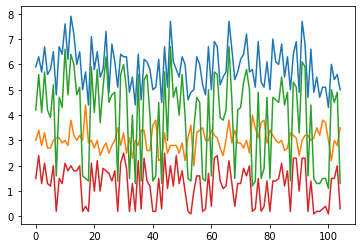

In [4]:
plt.plot(X_train)

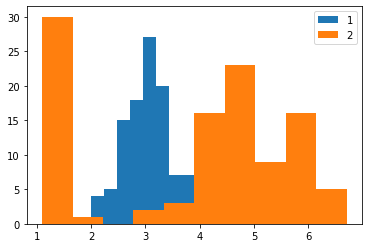

In [5]:
plt.hist(X_train[:,1], label='1')
plt.hist(X_train[:,2],label='2')
plt.legend()

In [6]:
# Standardize the data before modeling  
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


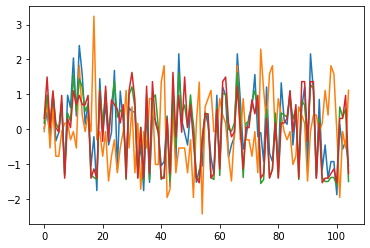

In [7]:
plt.plot(X_train_std)

In [8]:
X_train_std

array([[ 2.03969967e-02, -6.98130915e-02,  1.72927206e-01,
         3.08021404e-01],
       [ 4.96326920e-01,  8.76041697e-01,  9.82490878e-01,
         1.49610396e+00],
       [-2.17567965e-01, -5.42740486e-01,  1.15101230e-01,
         4.40030577e-02],
       [ 9.72256842e-01,  6.39578000e-01,  1.04031685e+00,
         1.10007644e+00],
       [-3.36550445e-01, -7.79204183e-01,  1.72927206e-01,
         4.40030577e-02],
       [-9.85854840e-02, -7.79204183e-01, -5.50723586e-04,
        -8.80061154e-02],
       [ 7.34291881e-01, -6.98130915e-02,  7.51186972e-01,
         9.68067269e-01],
       [-1.28841029e+00,  1.66650606e-01, -1.33054818e+00,
        -1.40809785e+00],
       [ 9.72256842e-01,  1.66650606e-01,  4.62057089e-01,
         3.08021404e-01],
       [ 6.15309400e-01, -3.06276789e-01,  2.30753183e-01,
         4.40030577e-02],
       [ 2.04309917e+00, -6.98130915e-02,  1.56075064e+00,
         1.10007644e+00],
       [ 3.77344439e-01, -5.42740486e-01,  5.19883066e-01,
      

In [9]:
KNeighborsClassifier?

In [10]:
knn = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [11]:
y_pred = knn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())



Accuracy: 0.93
Misclassified samples: 3


## Assignment : K Nearest Neighbor classifiction for the Glass dataset


### Glass Identification Dataset:

Attribute Information:

   	1. Id number: 1 to 214
   	2. RI: refractive index
   	3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   	4. Mg: Magnesium
   	5. Al: Aluminum
   	6. Si: Silicon
   	7. K: Potassium
   	8. Ca: Calcium
   	9. Ba: Barium
  	10. Fe: Iron
  	11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps
      
You can download the dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/glass+identification)

#### Procedure:

1. Load libraries/ data

	- Load and explore the shape of the dataset

2. Summarize Data

	- Descriptive statistics
	- Correlation matrix
	- Univariate and bivariate analysis and visualizations
	
	**`What did you understand about data?`**

3. Data Preparation:

	- Data Cleaning: Do you need to clean the data?
	- Split-out validation dataset
	- Data transformation

4. Baseline model: train a KNN classifier to serve as the baseline. 

5. Parameter tuning with cross validation:

	Obviously, the best **K** is the one that corresponds to the **lowest test 	error rate**, so let’s suppose we carry out repeated measurements of the test 	error for different values of K. 

	However, what we are doing is using the test set as a training set! This means that we are underestimating the true error rate since our model has been forced to fit the test set in the best possible manner. 
	
	Our model is then incapable of generalizing to newer observations, a process known as **overfitting**. So, touching the test set is out of the question and must only be done at the very end of our pipeline.
	
	`Using the test set for hyperparameter tuning can lead to overfitting.`
	
	**An alternative and smarter approach involves estimating the test error rate by holding out a subset of the training set from the fitting process.**

	**This subset, called the validation set, can be used to select the appropriate level of flexibility of our algorithm!**
	
	**There are different validation approaches that are used in practice, and we will be exploring one of the more popular ones called k-fold cross validation.**
	
	![cross-validation](https://kevinzakka.github.io/assets/k_fold_cv.jpg)
	
	As seen in the image, k-fold cross validation (the k is totally unrelated to K) involves randomly dividing the training set into k groups, or folds, of approximately equal size. 
	
	The first fold is treated as a validation set, and the method is fit on the remaining k−1 folds. The misclassification rate is then computed on the observations in the held-out fold. 
	
	This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error which are then averaged out. The code in below will help you to calculate the scores using k-fold cross validation.
		
	```
	from sklearn.model_selection import cross_val_score
	# creating odd list of K for KNN
	 k_list= list(range(1,50))
	
	# subsetting just the odd ones
	neighbors = filter(lambda x: x % 2 != 0, k_list)
	
	# empty list that will hold cv scores
	cv_scores = []
	
	# perform 10-fold cross validation
	for k in neighbors:
	    knn = KNeighborsClassifier(n_neighbors=k)
	    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
	    cv_scores.append(scores.mean())
	
	```

	As we can see above, scikit-learn comes in handy with its cross_val_score() method. We specifiy that we are performing 10 folds with the cv=10 parameter and that our scoring metric should be accuracy since we are in a classification setting.
	
	Finally, we plot the misclassification error versus K (Use the code below). 
	
	
	```
	# changing to misclassification error
	MSE = [1 - x for x in cv_scores]
	
	# determining best k
	optimal_k = neighbors[MSE.index(min(MSE))]
	print "The optimal number of neighbors is %d" % optimal_k
	
	# plot misclassification error vs k
	plt.plot(neighbors, MSE)
	plt.xlabel('Number of Neighbors K')
	plt.ylabel('Misclassification Error')
	plt.show()
	
	```
	** What would be the best value of K to choose??? Why? **




6. Apply Diagnostics:

 - A simple and effective way to remedy skewed class distributions is by implementing weighed voting. The class of each of the K neighbors is multiplied by a weight proportional to the inverse of the distance from that point to the given test point. This ensures that nearer neighbors contribute more to the final vote than the more distant ones. How can you do this in Sklean Knearestneighbor class?
 
- Changing the distance metric for different applications may help improve the accuracy of the algorithm. Which of other distance measures can you try? Do hem improve your model?

- Rescaling your data makes the distance metric more meaningful. For instance, given 2 features height and weight, an observation such as x=[180,70] will clearly skew the distance metric in favor of height. One way of fixing this is by column-wise subtracting the mean and dividing by the standard deviation. Scikit-learn’s normalize() method can come in handy. would this improve the results? How can you do this in Sklearn?

- Use Dimensionality reduction techniques like PCA:

	[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
		
	```
	from sklearn.decomposition import PCA
	```

-  should be executed prior to appplying KNN and help make the distance metric more meaningful.


After applying and testing for these diagnostics, how the model performance has improved? What is the final confusion matric that you can share? What is overall accuracy of the model?



	


 
 
 


### Source

The 'glass' data used here can be downloaded from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/glass/).

### Notes:

Type of glass: (class attribute)
1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps

### Imports

In [155]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#Reset some default parameters.
#warnings.filterwarnings('ignore')
sns.set(style="white")

### 1) Load Data

In [156]:
fpath = os.path.join('./data', 'glass.data')
columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
df = pd.read_csv(fpath, names=columns)

print('Dataframe shape is: {}'.format(df.shape))
df.head(n=10)

Dataframe shape is: (214, 11)


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


### 2) Data Description

#### 2.1) Summary

In [157]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


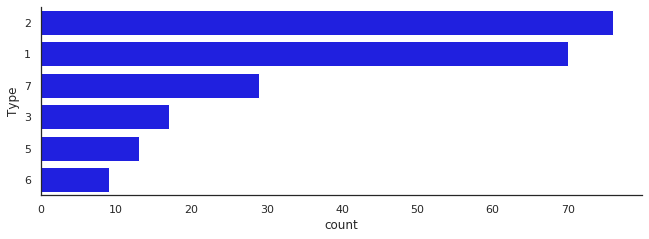

In [158]:
g = sns.catplot(
  data=df, y='Type', kind='count', order = df['Type'].value_counts().index, color='blue')
g.fig.set_size_inches(10,3)

#### 2.2 Correlation Matrix

(9.0, 0.0)

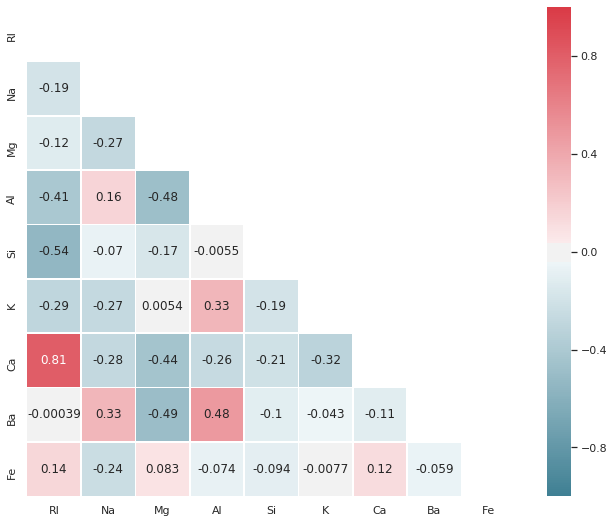

In [159]:
#Compute correlation. Include only relevant columns (i.e., remove id and Type.)
aux_cols = list(columns)
aux_cols.remove('Id')
aux_cols.remove('Type')
corr = df[aux_cols].corr()

#Mask top triangle, as it is redundant information.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1., vmax=1., center=0,
            annot=True, square=True, linewidths=.5)

#Fix y-axis limits.
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### 2.3) Type vs Composition

In [160]:
#Re-scale variables such that the quantities are comparable.
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

#Create a new column for each attribute containing the zscores.
for col in cols:
    z_scores = stats.zscore(df[col])
    df[col + '_zscore'] = z_scores


(6.0, 0.0)

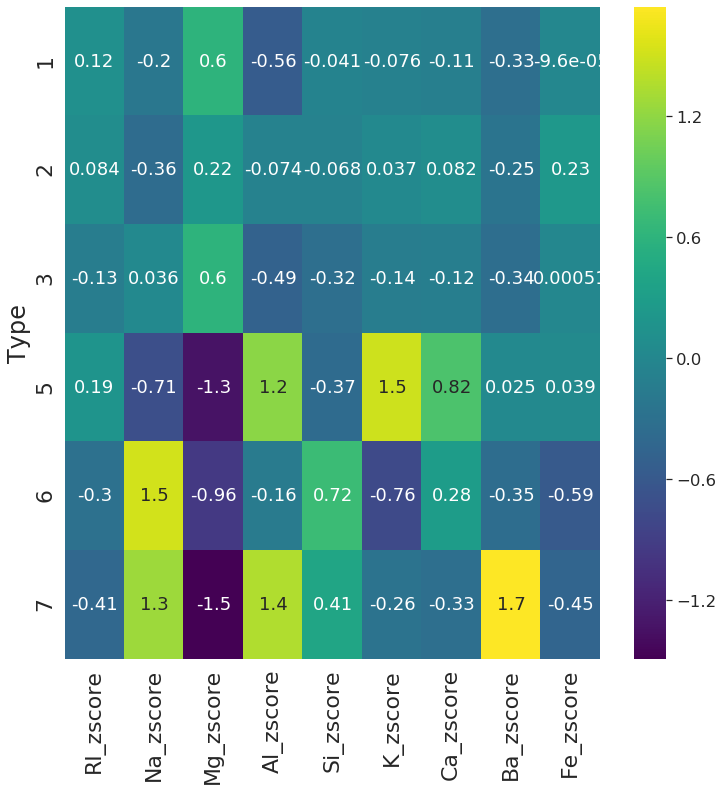

In [161]:
cols = ['RI_zscore', 'Na_zscore', 'Mg_zscore', 'Al_zscore', 'Si_zscore',
        'K_zscore', 'Ca_zscore', 'Ba_zscore', 'Fe_zscore', 'Type']

aux = df[cols].groupby(['Type']).mean()

sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.5)
sns.heatmap(aux, cmap='viridis', annot=True, ax=ax)

#Fix first and last rows. (Bug in recent matplotlib)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Corner Plot

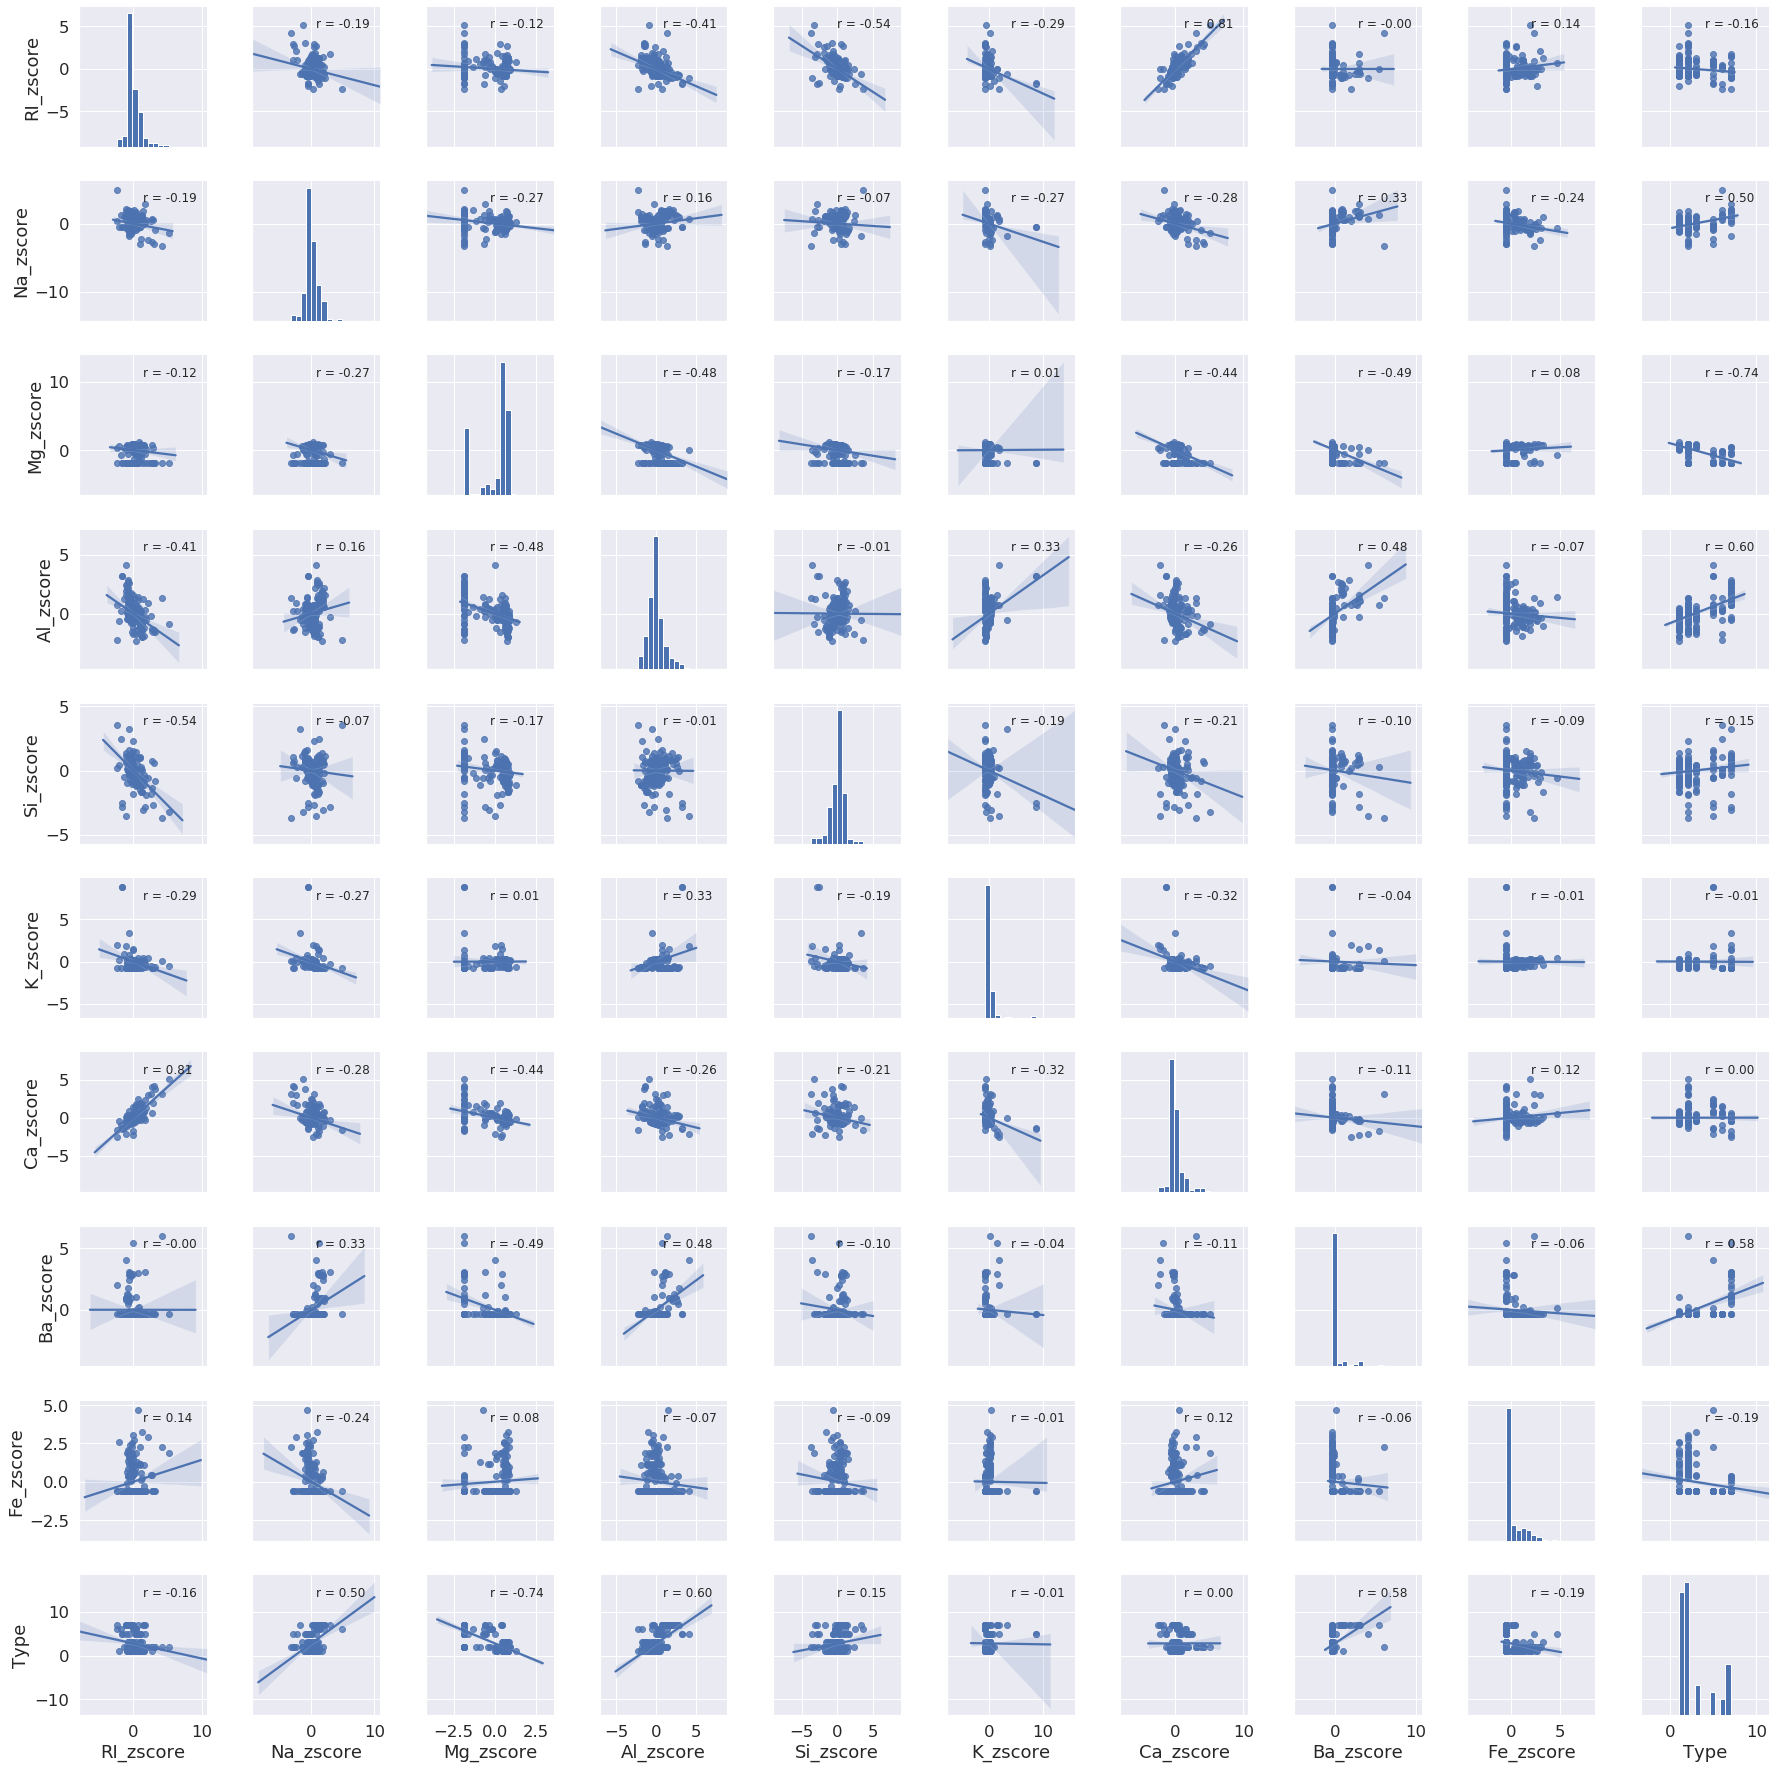

In [162]:
cols = ['RI_zscore', 'Na_zscore', 'Mg_zscore', 'Al_zscore', 'Si_zscore',
        'K_zscore', 'Ca_zscore', 'Ba_zscore', 'Fe_zscore', 'Type']
aux = df[cols]

#Calculate person stats for each plot.
coeffs = [format(stats.pearsonr(aux[c1], aux[c2])[0], '.2f')
          for (c1,c2) in list(itertools.product(cols,cols))]

g = sns.pairplot(aux, kind='reg')

for i, ax in enumerate(g.axes.flat):
    if i % 11 != 0:
        ax.text(0.5, 0.85,'r = {}'.format(coeffs[i]), fontsize=12, transform=ax.transAxes)

#### 2.4) Partial Conclusions

+ Data consists of:
  + Two main attributes: index of refraction (IR) and usage (Type)
  + Composition: Na, Mg, Al, Si, K, Ca, Ba, Fe.
+ The IR exhibits a short range, such that IR belong to [1.511, 1.534], with a median of 1.517.
+ There are 7 different types of glasses. More info can be found in './data/glass.names'
  + Most common types are 2 (building_windows_non_float_processed) and 1 (building_windows_float_processed)
+ Correlations:
  + The index of refraction is primarily determined by the amount of Ca in the composition. Secondary factors are Si and Al. An increase in ca will tend ti increase the IR whereas and increase in Si or Al will have the oppposite effect.
+ Types vc Composition
  + Types 1, 2 and 3 have a balanced distribution of elements.
  + Types 6 and 7 require a relatively high amount of Na.
  + Types 5 and 7 require a relatively low amount of Mg and high amount of Al.
  + While Type 5 further requires a high amount of K, Type 7 reguires a high amount of Ba.
  + Fe is present is relatively moderate amounts in all types.
+ Corner Plot:
  + Mg shows a bimodal distribution.
  + Most elements are fairly independent of the others. HIghest correlations are only moderate, [0.4--0.5], between Mg and Al and Mg and Ca.
  + Reinforces that IR is highly correlated with Ca
  
  


### 3) Data Preparation

In [163]:
#Check if there are any null values.
df.isnull().values.any()

False

In [164]:
#Split dataset into train and validation.
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
X = df[cols]
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [165]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 4) Baseline Model

In [166]:
#Train model.
knn = KNeighborsClassifier(n_neighbors=9, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

#Calculate predictions.
y_pred = knn.predict(X_test_std)

In [167]:
#Show how well it performed.
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d/%d' % ((y_test != y_pred).sum(), len(y_pred) ))

Accuracy: 0.70
Misclassified samples: 13/43


### 5) Model tuning

#### 5.1) Calculations

In [170]:
#Create list of neighbors to test. Include only odd numbers
K_list = list(range(1,52,2))

N_folds = 10
cv_scores = np.zeros(len(K_list))

for i, K in enumerate(K_list):
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, X_train_std, y_train, cv=N_folds, scoring='accuracy')
    cv_scores[i] = scores.mean()

[0.73899897 0.65958075 0.63238777 0.60176858 0.62342363 0.57170795
 0.5788403  0.56462461 0.57472265 0.58092363 0.60180599 0.60137771
 0.5802322  0.57434985 0.58627967 0.57924536 0.58471104 0.58575851
 0.56664087 0.549613   0.56314886 0.51425181 0.49800181 0.50070433
 0.50044118 0.48789216]


#### 5.2) Visualization

The optimal number of neighbors is 1


Text(0, 0.5, 'Misclassification Error')

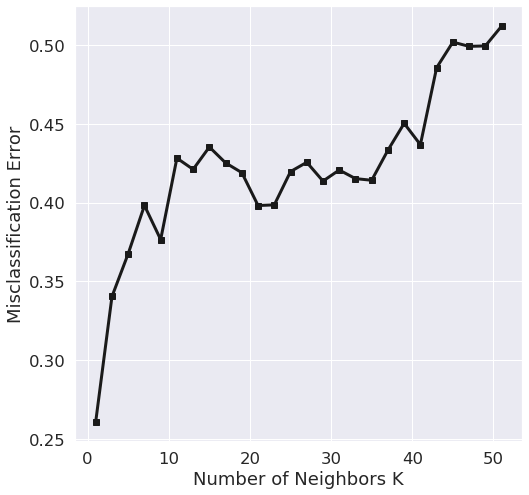

In [173]:
#Calculate y variable as error.
MSE = np.array([1 - x for x in cv_scores])

#Print out the best k
optimal_k = K_list[MSE.argmin()]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(K_list, MSE, ls='-', marker='s', lw=3., color='k')
ax.set_xlabel('Number of Neighbors K')
ax.set_ylabel('Misclassification Error')


#### 5.3) Partial Conclusions

+ The preferred number of neighbor is 1 because it gives the lowest error.